# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**
Homework4: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kos261/ML25/blob/main/Lab4/HW4.ipynb)
-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


# Reminder 

$$\text{Bias}^2(\hat{\theta}) = \left(\mathbb{E}[\hat{\theta}] - \theta\right)^2$$

$$\text{Var}(\hat{\theta}) = \mathbb{E}\left[ \left(\hat{\theta} - \mathbb{E}[\hat{\theta}] \right)^2 \right]$$

$$\text{MSE}(\hat{\theta}) = \mathbb{E}\left[(\hat{\theta} - \theta)^2\right] 
= \text{Var}(\hat{\theta}) + \text{Bias}^2(\hat{\theta})$$

In [27]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(101)

beta_len = 50
n_samples = 100

beta = np.zeros(beta_len)
beta[[0, 5, 11, 12, 33, 38, 49]] = [1.5, -2.5, -3.0, 1.0, 2.5, 0.8, 1.2]
beta_0 = 5.0

X = np.random.randn(n_samples, beta_len)
Y = beta_0 + X.dot(beta) + np.random.normal(0, 1, n_samples)  # Adding noise
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [28]:
def calculate_bias_variance(model, X, y, alphas, n_repeats=100):
    predictions = np.zeros((len(alphas), len(y), n_repeats))
    
    for i, a in enumerate(alphas):
        for repeat in range(n_repeats):
            X_sample, y_sample = resample(X, y)
            mdl = model(alpha=a)
            mdl.fit(X_sample, y_sample)
            predictions[i, :, repeat] = mdl.predict(X)
    
    mean_predictions = np.mean(predictions, axis=2)
    biases_squared = np.mean((y - mean_predictions)**2, axis=1)
    variances = np.mean(np.var(predictions, axis=2), axis=1)
    mses = biases_squared + variances
    
    return biases_squared, variances, mses

In [29]:
def plot_bias_variance_tradeoff(lambdas, bias_squared, variances, mses, title):
    plt.figure(figsize=(10, 6))
    
    plt.plot(lambdas, bias_squared, label='Bias²', marker='o', linestyle='-', linewidth=2)
    plt.plot(lambdas, variances, label='Variance', marker='s', linestyle='-', linewidth=2)
    plt.plot(lambdas, mses, label='MSE', marker='^', linestyle='-', linewidth=3, color='red')
    
    optimal_idx = np.argmin(mses)
    plt.axvline(lambdas[optimal_idx], color='gray', linestyle='--', 
                label=f'Optimal λ={lambdas[optimal_idx]:.1f}')
    
    plt.xscale('log')
    plt.xlabel('Lambda (Regularization Parameter)', fontsize=12)
    plt.ylabel('Error', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Calculating metrics for Ridge Regression...
Calculating metrics for Lasso Regression...

Plotting results...


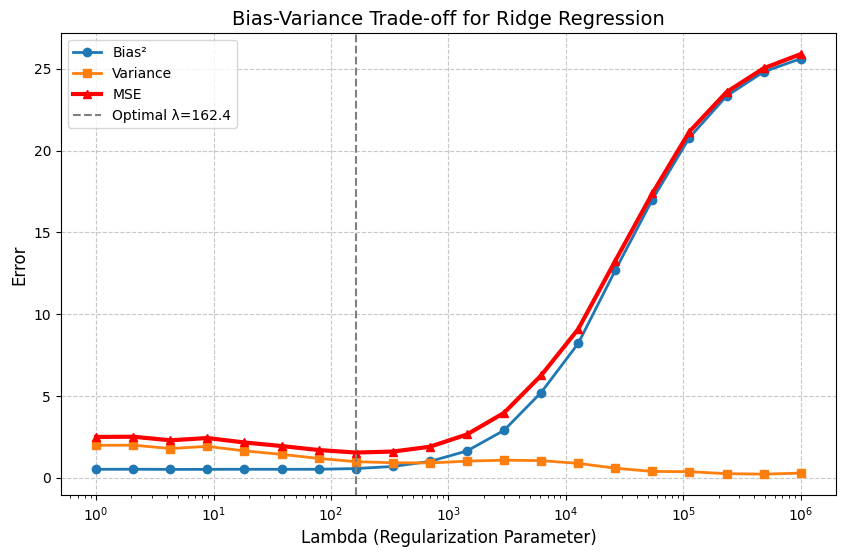

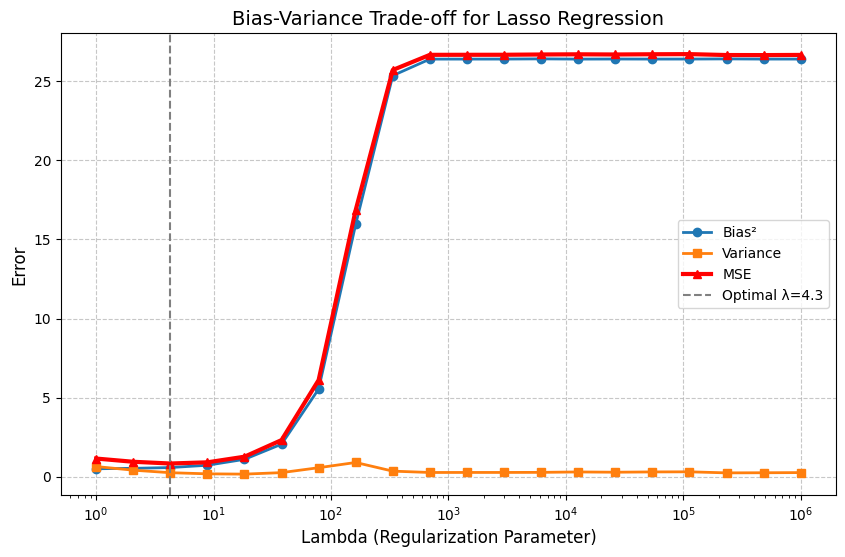

In [ ]:
alphas = np.logspace(-2, 4, 20)
lambdas = alphas * n_samples

ridge_bias_squared, ridge_variances, ridge_mses = calculate_bias_variance(Ridge, X, Y, alphas)

lasso_bias_squared, lasso_variances, lasso_mses = calculate_bias_variance(Lasso, X, Y, alphas)

plot_bias_variance_tradeoff(lambdas, ridge_bias_squared, ridge_variances, ridge_mses,
                          'Bias-Variance Trade-off for Ridge Regression')
plot_bias_variance_tradeoff(lambdas, lasso_bias_squared, lasso_variances, lasso_mses,
                          'Bias-Variance Trade-off for Lasso Regression')


# ANSWER:
As labda increases bias increases but MSE and Variance lowers. The model become more stable but more constrained.


**LASSO** performs better with sparse data **(few important features). We can see on the plot that with threshold around $10 < \lambda < 100$ Lasso sets most of coefs to zero significantly increasing bias.

**RIDGE** performs better with strongly correlated features and has smoother transition  